In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Import Files**

In [2]:
few_fish_night_csv = "output/23_01_24_13-29-58_first_run/22-11-16_start_02-23-35_output.csv"
few_fish_night_new_csv = "output/23_01_25_11-43-29_first_run/22-11-16_start_02-23-35_output.csv"
many_fish_afternoon_csv = "output/23_01_24_12-20-29_first_run/22-11-14_start_16-46-57_output.csv"

few_fish = pd.read_csv(few_fish_night_csv, delimiter=",")
few_fish_new = pd.read_csv(few_fish_night_new_csv, delimiter=",")
many_fish = pd.read_csv(many_fish_afternoon_csv, delimiter=",")

In [3]:
value_counts_few = pd.DataFrame(few_fish.ID.value_counts()).reset_index().rename(columns={"index": "ID", "ID": "occurences"})
value_counts_few_new = pd.DataFrame(few_fish_new.ID.value_counts()).reset_index().rename(columns={"index": "ID", "ID": "occurences"})
value_counts_many = pd.DataFrame(many_fish.ID.value_counts()).reset_index().rename(columns={"index": "ID", "ID": "occurences"})

**PLOT PATHS**

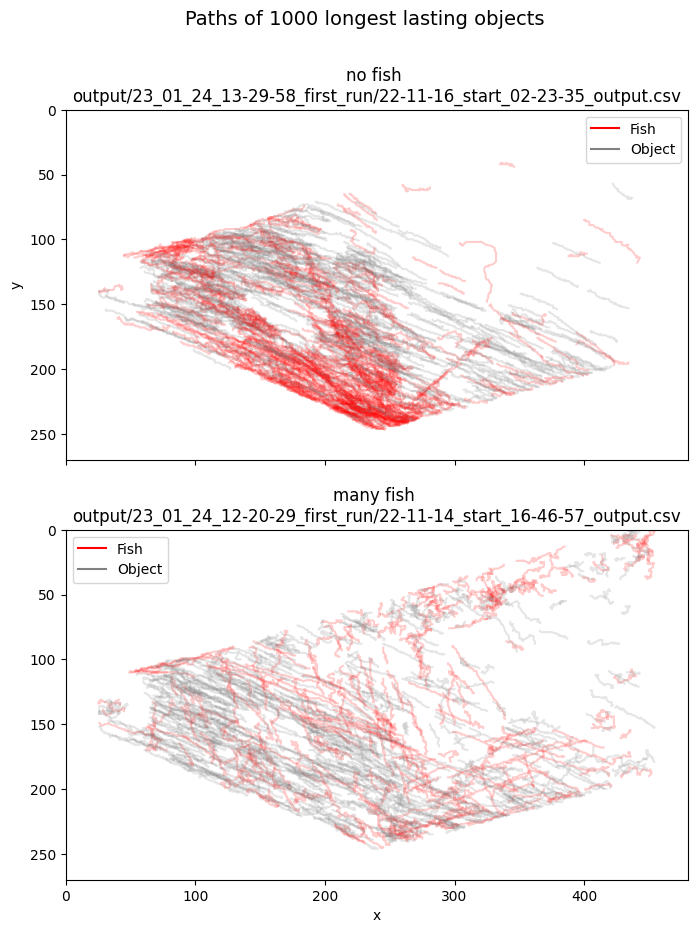

In [4]:
amount = 1000
alpha = 0.2
fish_color = "red"
object_color = "grey"

fig, [ax, ax1] = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
plt.gca().invert_yaxis()

data = few_fish
for object in value_counts_few.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
    else: 
        color = object_color
    ax.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)
    
data = many_fish
for object in value_counts_many.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
    else: 
        color = object_color
    ax1.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)

ax.set(ylabel='y',
       title="no fish \n" + few_fish_night_csv, ylim=[270, 0], xlim=[0, 480])
ax1.set(xlabel='x', title="many fish \n" + many_fish_afternoon_csv, ylim=[270, 0], xlim=[0, 480])
ax.set_aspect('equal', adjustable='box')
ax1.set_aspect('equal', adjustable='box')
fig.suptitle(f"Paths of {amount} longest lasting objects", fontsize=14)

line1 = ax.plot([],[], color=fish_color, label='Fish')
line2 = ax.plot([],[], color=object_color, label='Object')
ax.legend()
line1 = ax1.plot([],[], color=fish_color, label='Fish')
line2 = ax1.plot([],[], color=object_color, label='Object')
ax1.legend()

plt.show()

**Compare with new classification rules**

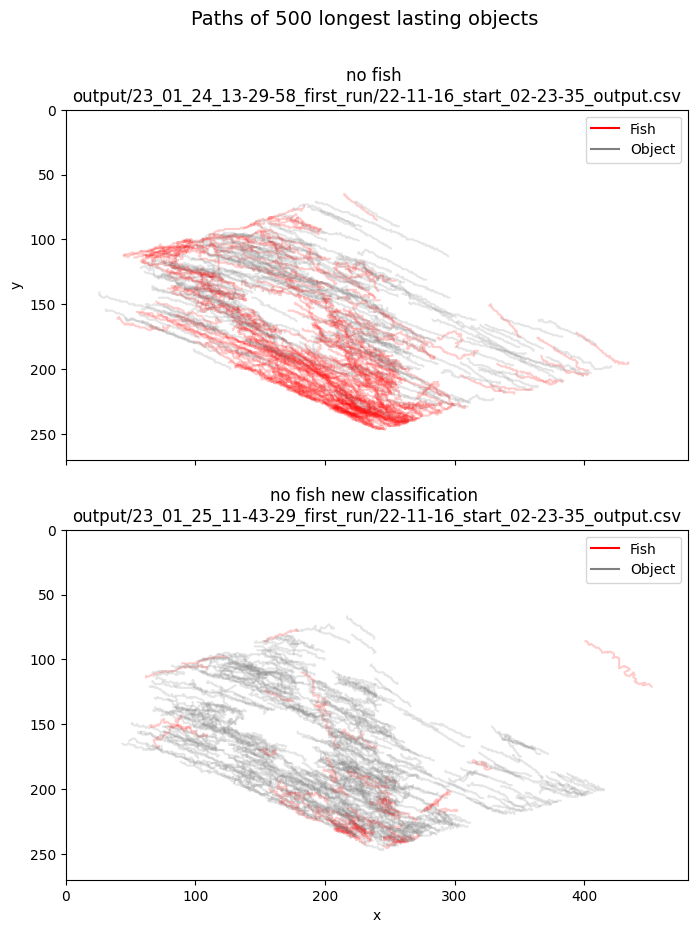

In [5]:
amount = 500
alpha = 0.2
fish_color = "red"
object_color = "grey"

fig, [ax, ax1] = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
plt.gca().invert_yaxis()

data = few_fish
for object in value_counts_few.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
    else: 
        color = object_color
    ax.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)
    
data = few_fish_new
for object in value_counts_few_new.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
    else: 
        color = object_color
    ax1.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)

ax.set(ylabel='y',
       title="no fish \n" + few_fish_night_csv, ylim=[270, 0], xlim=[0, 480])
ax1.set(xlabel='x', title="no fish new classification \n" + few_fish_night_new_csv, ylim=[270, 0], xlim=[0, 480])
ax.set_aspect('equal', adjustable='box')
ax1.set_aspect('equal', adjustable='box')
fig.suptitle(f"Paths of {amount} longest lasting objects", fontsize=14)

line1 = ax.plot([],[], color=fish_color, label='Fish')
line2 = ax.plot([],[], color=object_color, label='Object')
ax.legend()
line1 = ax1.plot([],[], color=fish_color, label='Fish')
line2 = ax1.plot([],[], color=object_color, label='Object')
ax1.legend()

plt.show()

**PLOT Velocities**

In [101]:
data.head()

,t,frame number,x,y,w,h,Classification,ID
0,14-11-22_16-47-03.100,122,174,202,4,4,Objekt,1
1,14-11-22_16-47-03.100,122,230,194,2,2,Objekt,2
2,14-11-22_16-47-03.100,122,184,161,3,4,Objekt,3
3,14-11-22_16-47-03.100,122,94,156,3,3,Objekt,4
4,14-11-22_16-47-03.100,122,159,111,2,1,Objekt,5


In [144]:
def augment_velocity_data(dataframe):
    dataframe["v_x"] = np.nan
    dataframe["v_y"] = np.nan
    return dataframe[["frame number", "x", "y"]].shift(periods=-20) - dataframe[["frame number", "x", "y"]]

In [145]:
diff_ = augment_velocity_data(dataframe=few_fish.loc[few_fish.ID == 142550])
diff_.iloc[10:, :]

/var/folders/7r/xlxx4mdj70ld8qlw_bhsrsqh0000gn/T/ipykernel_7524/1768163282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["v_x"] = np.nan
/var/folders/7r/xlxx4mdj70ld8qlw_bhsrsqh0000gn/T/ipykernel_7524/1768163282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["v_y"] = np.nan


,frame number,x,y
211527,20.0,-10.0,-1.0
211556,20.0,-10.0,-2.0
211586,20.0,-9.0,-3.0
211619,20.0,-9.0,-2.0
211653,20.0,-9.0,-2.0
...,...,...,...
228001,NaN,NaN,NaN
228025,NaN,NaN,NaN
228047,NaN,NaN,NaN
228067,NaN,NaN,NaN


<AxesSubplot: >

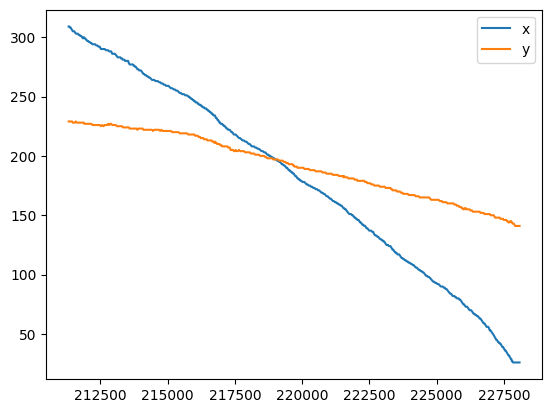

In [134]:
dataframe = few_fish.loc[few_fish.ID == 142550]
dataframe[["x", "y"]].iloc[2:, :].astype(float).plot()

In [135]:
dataframe[["frame number", "x", "y"]].iloc[100:, :]

,frame number,x,y
214595,7138,263,222
214638,7139,263,222
214682,7140,262,222
214727,7141,262,221
214769,7142,261,222
...,...,...,...
228001,7549,26,141
228025,7550,26,141
228047,7551,26,141
228067,7552,26,141


In [135]:
dataframe[["frame number", "x", "y"]].iloc[:, :]

,frame number,x,y
214595,7138,263,222
214638,7139,263,222
214682,7140,262,222
214727,7141,262,221
214769,7142,261,222
...,...,...,...
228001,7549,26,141
228025,7550,26,141
228047,7551,26,141
228067,7552,26,141


In [74]:
amount = 1000
alpha = 0.2
fish_color = "red"
object_color = "grey"

fig, [ax, ax1] = plt.subplots(nrows=2, ncols=1, sharex=True,  figsize=(10, 10))
plt.gca().invert_yaxis()

data = few_fish
for object in value_counts_few.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
        continue
    else: 
        color = object_color
    ax.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)
    
data = many_fish
for object in value_counts_many.ID.tolist()[:amount]:
    if data.loc[data.ID == object, "Classification"].value_counts().idxmax() == "Fisch":
        color = fish_color
        continue
    else: 
        color = object_color
    ax1.plot(data.loc[data.ID == object, "x"], data.loc[data.ID == object, "y"], alpha=alpha, color=color)

ax.set(ylabel='y',
       title="no fish \n" + few_fish_night_csv, ylim=[270, 0], xlim=[0, 480])
ax1.set(xlabel='x', title="many fish \n" + many_fish_afternoon_csv, ylim=[270, 0], xlim=[0, 480])
ax.set_aspect('equal', adjustable='box')
ax1.set_aspect('equal', adjustable='box')
fig.suptitle(f"Paths of {amount} longest lasting objects", fontsize=14)

line1 = ax.plot([],[], color=fish_color, label='Fish')
line2 = ax.plot([],[], color=object_color, label='Object')
ax.legend()
line1 = ax1.plot([],[], color=fish_color, label='Fish')
line2 = ax1.plot([],[], color=object_color, label='Object')
ax1.legend()

plt.show()

Objekt
